<a href="https://colab.research.google.com/github/AlexanderSlokov/aiClassPracticeAssignments/blob/main/MidTermExam_FlowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries to preprocessing images
from os import listdir
from numpy import asarray, save
from keras.utils import img_to_array
from keras.utils import load_img
import cv2
import numpy as np

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Access Drive Folder
import matplotlib.pyplot as plt
from matplotlib.image import imread 
folder = '/content/drive/MyDrive/AI Picture Datasets Resized/BulkResizePhotosFlowerClassification/'

In [ ]:
# Read the images and its name
photos, labels = list(), list()
for file in listdir(folder):

  if file.startswith('daisy'):
    output = 0

  if file.startswith('dandelion'):
    output = 1

  if file.startswith('roses'):
    output = 2

  if file.startswith('sunflowers'):
    output = 3

  if file.startswith('tulips'):
    output = 4
  

# Load folder and preprocessing
  #photo = load_img(folder + file)
# New code to preprocess images
  photo = cv2.imread('/content/drive/MyDrive/AI Picture Datasets Resized/BulkResizePhotosFlowerClassification/' + file)
  photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
  photo = img_to_array(photo, dtype = np.float32)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos, dtype = np.float32 )
labels =  asarray(labels)


In [ ]:
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI_data_preprocessing/Midterm_FlowerClassification_photos.npy', photos)
save('/content/drive/MyDrive/AI_data_preprocessing/Midterm_FlowerClassification_labels.npy', labels)

(625, 224, 224, 3) (625,)


In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU, BatchNormalization
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy   
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import load_img, img_to_array

import tensorflow as tf
import keras
import numpy as np

In [ ]:
# load the preprocessed data
data = np.load('/content/drive/MyDrive/AI_data_preprocessing/Midterm_FlowerClassification_photos.npy')
labels = np.load('/content/drive/MyDrive/AI_data_preprocessing/Midterm_FlowerClassification_labels.npy')

In [ ]:
# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(400, 224, 224, 3)
(400,)
(125, 224, 224, 3)
(125,)
(100, 224, 224, 3)
(100,)


In [ ]:
x_train_reshape = x_train.reshape(400, 224, 224, 3)
train_reshape = x_train_reshape.astype('float32')/255

x_test_reshape = x_test.reshape(125, 224, 224, 3)
test_reshape = x_test_reshape.astype('float32')/255

x_val_reshape = x_val.reshape(100, 224, 224, 3)
val_reshape = x_val_reshape.astype('float32')/255
# the to_cactagorical line must only run 1 time in a session

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [ ]:
model = Sequential()

input_layer = tf.keras.layers.Input([224, 224, 3])

conv1 = tf.keras.layers.Conv2D(filters = 32, kernel_size=(5, 5), activation='relu', padding='same') (input_layer)
pooling1 = tf.keras.layers.MaxPooling2D(pool_size = (2, 2)) (conv1)

conv2 = tf.keras.layers.Conv2D(filters = 64, kernel_size=(5, 5), activation='relu', padding='same') (pooling1)
pooling2 = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2,2)) (conv2)

conv3 = tf.keras.layers.Conv2D(filters = 96, kernel_size=(4, 4), activation='relu', padding='same') (pooling2)
pooling3 = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2,2)) (conv3)

conv4 = tf.keras.layers.Conv2D(filters = 128, kernel_size=(4, 4), activation='relu', padding='same') (pooling3)
pooling4 = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2,2)) (conv4)

conv5 = tf.keras.layers.Conv2D(filters = 256, kernel_size=(3, 3), activation='relu', padding='same') (pooling4)
pooling5 = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2,2)) (conv5)

# The ANN's flatten begining layer
flatten = tf.keras.layers.Flatten() (pooling5)

# Hidden layers
dense1 = tf.keras.layers.Dense(512, activation = 'relu') (flatten)

# Output layer
output_layer = tf.keras.layers.Dense(5, activation = 'Softmax') (dense1)   

In [ ]:
# compile the model
model = tf.keras.Model(input_layer, output_layer)

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3, verbose = 1, mode='max')

model.compile(loss  = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
# train the model
train = model.fit(x_train, y_train, epochs = 50, batch_size = 96, callbacks=[callback], verbose = 1)

Epoch 1/50
5/5 [==============================] - 3s 227ms/step - loss: 24.2101 - accuracy: 0.1950
Epoch 2/50
5/5 [==============================] - 1s 136ms/step - loss: 10.9041 - accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 1s 136ms/step - loss: 2.4479 - accuracy: 0.2325
Epoch 4/50
5/5 [==============================] - 1s 135ms/step - loss: 1.8507 - accuracy: 0.2725
Epoch 5/50
5/5 [==============================] - 1s 137ms/step - loss: 1.5836 - accuracy: 0.3125
Epoch 6/50
5/5 [==============================] - 1s 137ms/step - loss: 1.3428 - accuracy: 0.4300
Epoch 7/50
5/5 [==============================] - 1s 139ms/step - loss: 1.2897 - accuracy: 0.4400
Epoch 8/50
5/5 [==============================] - 1s 139ms/step - loss: 1.1774 - accuracy: 0.5650
Epoch 9/50
5/5 [==============================] - 1s 140ms/step - loss: 1.1233 - accuracy: 0.5475
Epoch 10/50
5/5 [==============================] - 1s 144ms/step - loss: 0.9980 - accuracy: 0.6775
Epoch 11/50
5/5 [

In [ ]:
# evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

4/4 [==============================] - 1s 82ms/step - loss: 1.3149 - accuracy: 0.5600
Test Loss: 1.3149371147155762
Test Accuracy: 0.5600000023841858


ValueError: ignored

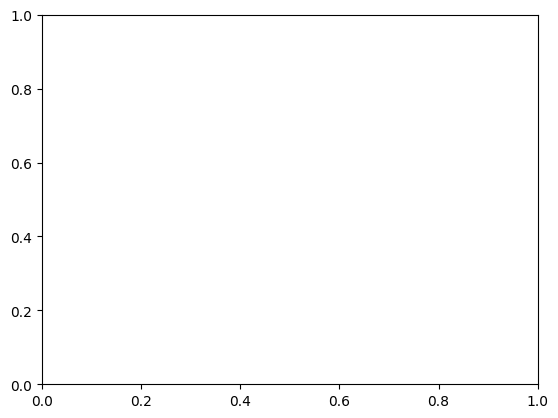

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
loss = train.history['loss']
accuracy = train.history['accuracy']

# Plot the training loss and accuracy curves
epochs = np.arange(1, 28)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss and accuracy')
plt.legend()
plt.show()